c:\program files\python36\lib\site-packages\pandas\core\generic.py:1534: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



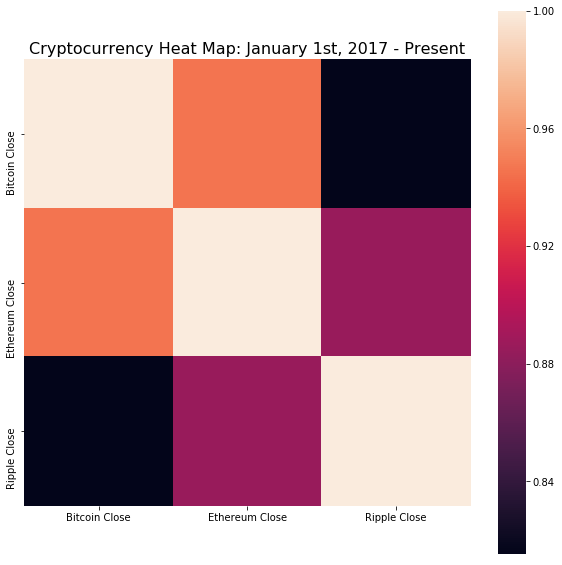

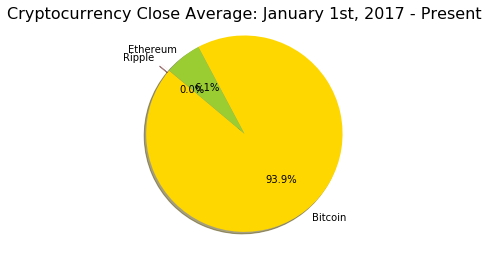

In [47]:
import sqlite3 as sql3  # Importing SQLITE

# IMPORTING PACKAGES FOR PROJECT
import matplotlib.dates as matdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import seaborn as sns
from pandas.tools.plotting import table

db = 'cryptoGG'
con = sql3.connect('./db/cryptoGG.db')
color = sns.color_palette()

# set up plotting inside a Jupyter notebook
%matplotlib inline

# Pandas options
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Files Uploaded to the DB
files = ["bitcoin_price.csv", "ethereum_price.csv", "ripple_price.csv"]

cols = []
for i, file_name in enumerate(files):
    # data = file_name.split(".")[0]
    if i == 0:
        df = pd.read_csv(
            "./data/" + file_name,
            usecols=[
                "Date", "Open", "High", "Low", "Close", "Volume", "Market Cap"
            ],
            parse_dates=["Date"])
        df.columns = [
            "Date", "Open", "High", "Low", "Close", "Volume", "Market Cap"
        ]
        # df.head()
    else:
        temp_df = pd.read_csv(
            "./data/" + file_name,
            usecols=[
                "Date", "Open", "High", "Low", "Close", "Volume", "Market Cap"
            ],
            parse_dates=["Date"])
        temp_df.columns = [
            "Date", "Open", "High", "Low", "Close", "Volume", "Market Cap"
        ]
        df = pd.merge(df, temp_df, on=["Date"])
        # df.head()
    # cols.append(data)


def run_query(query):  # CALLS DB
    return pd.read_sql_query(query, db)


# SENDS DF TO SQL
df.to_sql(
    db,
    con,
    schema=None,
    if_exists='replace',
    index=False,
    index_label=None,
    chunksize=None,
    dtype=None)


# Heat Map
def close_heatmap(e):
    sql = """
    SELECT Date,
    Close_x AS 'Bitcoin Close',
    Close_y AS 'Ethereum Close',
    Close AS 'Ripple Close'
    FROM cryptoGG
    WHERE Date>='2017-01-01 00:00:00'
    """

    df = pd.read_sql(sql, con)

    corrmat = df.corr(method="spearman")
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corrmat, vmax=1.0, square=True)
    plt.title(
        "Cryptocurrency Heat Map: January 1st, 2017 - Present", fontsize=16)
    plt.show()


# Create a Pie Chart
def close_avg_pie(e):

    sql = """
    SELECT Date,
    Close_x AS 'Bitcoin Close',
    Close_y AS 'Ethereum Close',
    Close AS 'Ripple Close'
    FROM cryptoGG
    WHERE Date>='2017-01-01 00:00:00'
    """

    df = pd.read_sql(sql, con)

    bitcoin_avg = df['Bitcoin Close'].mean()
    ethereum_avg = df['Ethereum Close'].mean()
    ripple_avg = df['Ripple Close'].mean()

    labels = ['Bitcoin', 'Ethereum', 'Ripple']
    values = [bitcoin_avg, ethereum_avg, ripple_avg]
    colors = ['gold', 'yellowgreen', 'red']
    explode = (0, 0, 0.1)  # explode 1st slice

    # Plot
    plt.pie(
        values,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)

    plt.axis('equal')
    plt.title(
        "Cryptocurrency Close Average: January 1st, 2017 - Present",
        fontsize=16)
    plt.show()


# Function Calls

# Creates Heat Map
close_heatmap(df)
# Creates Pie Chart of Close Avg
close_avg_pie(df)
